
### Exploratory Data Analysis (EDA)

This is a basic exploratory data analysis project meant to outline some of the preliminary steps or processes carried out on a dataset before proper analysis or modelling, which may include but is not limited to data cleaning, feature engineering, summary statisics and a number of visualizations.

Let's explore some of these practices.

In [354]:
# import relevant libraries for EDA 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# enable max display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

In [369]:
# load the data into a dataframe
eclipse_df = pd.read_csv(r'C:\Users\Ghost\Desktop\project_files\eclipse_data.csv')

In [356]:
#display top 5 rows of data
eclipse_df.head()

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration,Date Time,Year,Month,Day,Visibility,Eclipse Latitude,Eclipse Longitude,obliquity,Geographical Hemisphere,Daytime/Nighttime,Sun Constellation,Inter-Eclipse Duration,Visibility Score,Eclipse Classification,Duration in Seconds,Moon Distance (km),Sun Distance (km),Moon Angular Diameter (degrees),Sun Angular Diameter (degrees),Central Duration Seconds,Normalized Duration,Normalized Path Width,EII,Year Modulus,HEAS,Decade,Localized ESC,ESC Moving Average,ESC Wide-Scale Moving Average,Eclipse Interval,Cluster,Cluster 6
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,0.992601,6.0N,33.3W,74,344,247,06m37s,1999 BCE June 12,-1999,6,12,Not Visible,6.0,-33.3,23.924711,N W,Nighttime,Gemini,0,0.758788,Total Eclipse,NaN,403514.260636,1.520139e+08,0.493391,0.524280,397.0,0.534320,0.174066,0.662068,1999,0.333667,-2000,1.556657,NaN,NaN,0.333333,0,1
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.867659,32.9S,10.8E,76,21,236,06m44s,1999 BCE December 5,-1999,12,5,Not Visible,-32.9,10.8,23.924711,S E,Nighttime,Sagittarius,176,0.707120,Annular Eclipse,NaN,379007.783424,1.470789e+08,0.525293,0.541871,404.0,0.543742,0.166314,0.608567,1999,0.333667,-2000,1.556657,NaN,NaN,0.500000,0,1
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,0.951077,46.2N,83.4E,60,151,111,02m15s,1998 BCE June 1,-1998,6,1,Not Visible,46.2,83.4,23.924607,N E,Nighttime,Gemini,178,0.537048,Total Eclipse,NaN,398233.676847,1.521958e+08,0.499933,0.523653,135.0,0.181696,0.078224,0.498677,1998,0.334000,-2000,1.792195,NaN,NaN,0.500000,0,1
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.906871,67.8S,143.8W,25,74,162,01m14s,1998 BCE November 25,-1998,11,25,Not Visible,-67.8,-143.8,23.924607,S W,Nighttime,Sagittarius,177,0.189335,Annular Eclipse,NaN,388653.662816,1.469485e+08,0.512256,0.542352,74.0,0.099596,0.114165,0.389974,1998,0.334000,-2000,1.792195,NaN,NaN,0.500000,0,1
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.148987,60.6S,106.4W,0,281,NaN,NaN,1997 BCE April 22,-1997,4,22,Not Visible,-60.6,-106.4,23.924502,S W,Daytime,Taurus,148,0.049909,Partial from Edge,NaN,377059.826687,1.521384e+08,0.528006,0.523851,NaN,NaN,NaN,NaN,1997,0.334333,-2000,2.004286,NaN,NaN,0.472222,1,0


In [357]:
# general data information 
eclipse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11898 entries, 0 to 11897
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Catalog Number                   11898 non-null  int64  
 1   Calendar Date                    11898 non-null  object 
 2   Eclipse Time                     11898 non-null  object 
 3   Delta T (s)                      11898 non-null  int64  
 4   Lunation Number                  11898 non-null  int64  
 5   Saros Number                     11898 non-null  int64  
 6   Eclipse Type                     11898 non-null  object 
 7   Gamma                            11898 non-null  float64
 8   Eclipse Magnitude                11898 non-null  float64
 9   Latitude                         11898 non-null  object 
 10  Longitude                        11898 non-null  object 
 11  Sun Altitude                     11898 non-null  int64  
 12  Sun Azimuth       

In [358]:
# summary statistics
eclipse_df.describe()

,Catalog Number,Delta T (s),Lunation Number,Saros Number,Gamma,Eclipse Magnitude,Sun Altitude,Sun Azimuth,Year,Month,Day,Eclipse Latitude,Eclipse Longitude,obliquity,Inter-Eclipse Duration,Visibility Score,Duration in Seconds,Moon Distance (km),Sun Distance (km),Moon Angular Diameter (degrees),Sun Angular Diameter (degrees),Central Duration Seconds,Normalized Duration,Normalized Path Width,EII,Year Modulus,HEAS,Decade,Localized ESC,ESC Moving Average,ESC Wide-Scale Moving Average,Eclipse Interval,Cluster,Cluster 6
count,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,0.0,11898.000000,1.189800e+04,11898.000000,11898.000000,7604.000000,7604.000000,7517.000000,7517.000000,11898.000000,11898.000000,11898.000000,11898.000000,11889.000000,11094.000000,11898.000000,11898.000000,11898.000000
mean,5949.500000,12142.172802,-18546.959321,87.483190,-0.002469,0.751640,36.505295,180.264330,499.962431,6.525046,15.756682,0.064028,0.226332,23.627392,153.429400,0.348185,NaN,387572.380946,1.496294e+08,0.514518,0.532714,242.880063,0.326891,0.148215,0.533534,1303.112708,0.565629,495.457220,1.967233,1.967201,1.965299,0.477695,0.745672,0.760800
std,3434.801086,13583.402888,17906.572982,48.380284,0.900860,0.277812,32.417350,110.745408,1447.767195,3.450231,8.795934,50.651249,103.980255,0.180074,46.220804,0.302952,NaN,15575.724298,1.827592e+06,0.020734,0.006509,148.647341,0.200064,0.113400,0.078071,804.840252,0.268280,1447.767405,0.213686,0.198401,0.078732,0.081478,1.287150,0.426613
min,1.000000,-6.000000,-49456.000000,-13.000000,-1.569000,0.000000,0.000000,0.000000,-1999.000000,1.000000,1.000000,-88.500000,-179.900000,23.309726,0.000000,0.000000,NaN,362573.592115,1.468861e+08,0.482172,0.523216,0.000000,0.000000,0.000000,0.329606,0.000000,0.000000,-2000.000000,1.540710,1.556143,1.850810,0.000000,0.000000,0.000000
25%,2975.250000,970.250000,-33954.750000,47.000000,-0.786575,0.625104,0.000000,89.000000,-745.750000,4.000000,8.000000,-51.400000,-89.500000,23.471276,148.000000,0.053313,NaN,372578.195650,1.478020e+08,0.495634,0.526237,126.000000,0.169583,0.076110,0.478539,624.000000,0.375000,-750.000000,1.763856,1.820603,1.894223,0.472222,0.000000,1.000000
50%,5949.500000,5636.500000,-18495.000000,87.000000,-0.003850,0.879127,38.000000,180.000000,504.000000,7.000000,16.000000,0.200000,-0.300000,23.632039,177.000000,0.291223,NaN,388428.062634,1.496464e+08,0.512553,0.532575,230.000000,0.309556,0.131078,0.532898,1248.000000,0.584000,500.000000,1.937797,1.955336,1.950866,0.500000,0.000000,1.000000
75%,8923.750000,20943.500000,-3039.250000,128.000000,0.776900,0.941829,66.000000,272.000000,1754.000000,10.000000,23.000000,51.600000,90.375000,23.785046,177.000000,0.607921,NaN,401687.776902,1.514485e+08,0.534357,0.539220,341.000000,0.458950,0.187456,0.590602,1875.000000,0.792000,1750.000000,2.111737,2.099923,2.043212,0.500000,1.000000,1.000000
max,11898.000000,46438.000000,12378.000000,190.000000,1.570600,1.000000,90.000000,360.000000,3000.000000,12.000000,31.000000,89.500000,180.000000,23.924711,188.000000,1.000000,NaN,412902.878496,1.523230e+08,0.549102,0.542582,743.000000,1.000000,1.000000,0.730625,3000.000000,1.000000,3000.000000,2.808746,2.730850,2.106552,1.000000,4.000000,1.000000


In [370]:
# drop irrelevant columns
# This dataset includes a large amount of attributes, most of which will be dropped for the purpose of this project
# columns to drop are over 30, use iloc to select columns to drop instead of naming each column

eclipse_df = eclipse_df.drop(eclipse_df.iloc[:, [2,3,4,5,7,9,10,11,12,13,14,15,17,18,20,21,22,23,26,29,30,31,32,33,35,36,37,38,39,40,41,42,43,44,45,46]], axis =1)
eclipse_df.columns

Index(['Catalog Number', 'Calendar Date', 'Eclipse Type', 'Eclipse Magnitude',
       'Year', 'Visibility', 'Daytime/Nighttime', 'Sun Constellation',
       'Visibility Score', 'Eclipse Classification',
       'Central Duration Seconds'],
      dtype='object')

In [371]:
# since catalog Number is unique for all values set it as index
eclipse_df = eclipse_df.set_index('Catalog Number')
eclipse_df.head(3)

,Calendar Date,Eclipse Type,Eclipse Magnitude,Year,Visibility,Daytime/Nighttime,Sun Constellation,Visibility Score,Eclipse Classification,Central Duration Seconds
Catalog Number,,,,,,,,,,
1,-1999 June 12,T,0.992601,-1999,Not Visible,Nighttime,Gemini,0.758788,Total Eclipse,397.0
2,-1999 December 5,A,0.867659,-1999,Not Visible,Nighttime,Sagittarius,0.707120,Annular Eclipse,404.0
3,-1998 June 1,T,0.951077,-1998,Not Visible,Nighttime,Gemini,0.537048,Total Eclipse,135.0


In [372]:
# rename columns where necessary 
eclipse_df = eclipse_df.rename(columns = {'Calendar Date': 'date', 'Central Duration Seconds': 'Central_duration(seconds)'})

#replace spaces with underscore in column names
eclipse_df.columns = eclipse_df.columns.str.replace(' ', '_')
eclipse_df.columns = eclipse_df.columns.str.lower()
eclipse_df.head(3)

,date,eclipse_type,eclipse_magnitude,year,visibility,daytime/nighttime,sun_constellation,visibility_score,eclipse_classification,central_duration(seconds)
Catalog Number,,,,,,,,,,
1,-1999 June 12,T,0.992601,-1999,Not Visible,Nighttime,Gemini,0.758788,Total Eclipse,397.0
2,-1999 December 5,A,0.867659,-1999,Not Visible,Nighttime,Sagittarius,0.707120,Annular Eclipse,404.0
3,-1998 June 1,T,0.951077,-1998,Not Visible,Nighttime,Gemini,0.537048,Total Eclipse,135.0


In [373]:
# reset the values of float attributes to 2 decimal places
eclipse_df[['eclipse_magnitude', 'visibility_score', 'central_duration(seconds)']] = round(eclipse_df[['eclipse_magnitude', 'visibility_score', 'central_duration(seconds)']], 2)

In [374]:
# remove the dash (-) from the values in the date and eclipse_type columns
eclipse_df['eclipse_type'] = eclipse_df['eclipse_type'].str.strip('-')
eclipse_df['date'] = eclipse_df['date'].str.strip('-',)

# check if changes worked
print(eclipse_df[eclipse_df['eclipse_type'].str.contains('-')].shape[0])
print(eclipse_df[eclipse_df['date'].str.contains('-')].shape[0])

0
0


In [375]:
# our date column seem to include years well out of range, remove years below 1900 and over 2023
eclipse_df = eclipse_df[(eclipse_df['year'] < 2024) & (eclipse_df['year'] > 1899)]


In [376]:
# Check data types of columns
eclipse_df.dtypes

date                          object
eclipse_type                  object
eclipse_magnitude            float64
year                           int64
visibility                    object
daytime/nighttime             object
sun_constellation             object
visibility_score             float64
eclipse_classification        object
central_duration(seconds)    float64
dtype: object

In [377]:
# change date column to datetime 
eclipse_df['date'] = pd.to_datetime(eclipse_df['date'], format = '%Y %B %d')


In [378]:
# create a year and month column from the eclipse_time column

eclipse_df['year'] = eclipse_df['date'].dt.year
eclipse_df['month'] = eclipse_df['date'].dt.month_name().str[:3]


In [379]:
# check for missing values 
eclipse_df.isna().sum()

date                           0
eclipse_type                   0
eclipse_magnitude              0
year                           0
visibility                     0
daytime/nighttime              0
sun_constellation              0
visibility_score               0
eclipse_classification         0
central_duration(seconds)    100
month                          0
dtype: int64

##### central_duration(seconds) column has a total of 100 missing values. Instead of dropping missing values, for the purpose of this project we will replace each missing value with the mean value of the attribute

In [398]:
# Handle NAN values
eclipse_df['central_duration(seconds)'] = eclipse_df['central_duration(seconds)'].replace(np.nan, eclipse_df['central_duration(seconds)'].mean())
eclipse_df.isna().sum()

date                         0
eclipse_type                 0
eclipse_magnitude            0
year                         0
visibility                   0
daytime/nighttime            0
sun_constellation            0
visibility_score             0
eclipse_classification       0
central_duration(seconds)    0
month                        0
dtype: int64

In [381]:
# Check for duplicates 
eclipse_df.duplicated().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

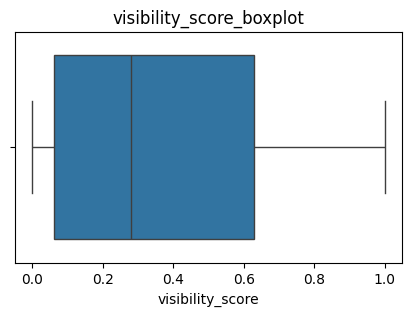

In [382]:
# Check necessary attributes for outliers using boxplot

plt.figure(figsize = (5,3))
sns.boxplot( x = eclipse_df['visibility_score'])
plt.title('visibility_score_boxplot')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

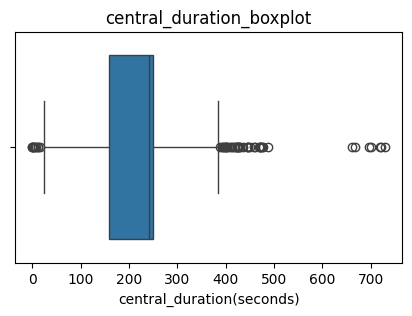

In [399]:
plt.figure(figsize = (5,3))
sns.boxplot( x = eclipse_df['central_duration(seconds)'])
plt.title('central_duration_boxplot')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

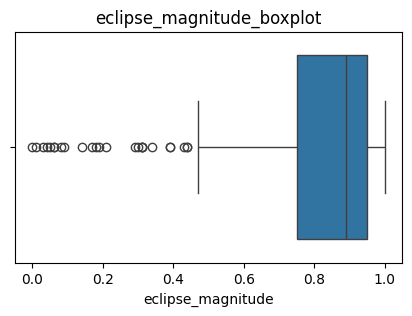

In [384]:
plt.figure(figsize = (5,3))
sns.boxplot( x = eclipse_df['eclipse_magnitude'])
plt.title('eclipse_magnitude_boxplot')
plt.show

##### Both central_duration(seconds) and eclipse_magnitude attribute record outliers, which are not unexpected given the data we are working with, so we will leave them as they are. In cases where we must handle outliers we could drop them by using the Interquartile Range(IQR)

##### we can demonstrate how this can be done using the eclipse_magnitude attribute

In [401]:
# use IQR to isolate outliers

# first calculate IQR 
Q1 = eclipse_df['eclipse_magnitude'].quantile(0.25)
Q3 = eclipse_df['eclipse_magnitude'].quantile(0.75)
IQR = Q3 - Q1

# use IQR to calculate the upper and lower limits
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR 

# display all ouliers in our dataset using our limits
mask = (eclipse_df['eclipse_magnitude'] < lower_limit) | (eclipse_df['eclipse_magnitude'] > upper_limit)

outliers = len(eclipse_df[mask])
print(f"Total number of outliers: {outliers}")
print()
eclipse_df[mask]


Total number of outliers: 25



,date,eclipse_type,eclipse_magnitude,year,visibility,daytime/nighttime,sun_constellation,visibility_score,eclipse_classification,central_duration(seconds),month
Catalog Number,,,,,,,,,,,
9285,1902-04-08,Pe,0.06,1902,Not Visible,Nighttime,Pisces,low,Unspecified Type,242.038889,Apr
9296,1906-08-20,Partial,0.29,1906,Not Visible,Nighttime,Leo,low,Partial from Edge,242.038889,Aug
9295,1906-07-21,Partial,0.31,1906,Not Visible,Daytime,Cancer,low,Partial from Edge,242.038889,Jul
9311,1913-08-31,Partial,0.14,1913,Not Visible,Nighttime,Leo,low,Partial from Edge,242.038889,Aug
9310,1913-04-06,Partial,0.39,1913,Not Visible,Nighttime,Pisces,low,Partial from Edge,242.038889,Apr
9319,1916-12-24,Partial,0.01,1916,Not Visible,Nighttime,Sagittarius,low,Partial from Edge,242.038889,Dec
9321,1917-06-19,Partial,0.44,1917,Not Visible,Nighttime,Taurus,low,Partial from Edge,242.038889,Jun
9322,1917-07-19,Pb,0.08,1917,Not Visible,Daytime,Gemini,low,Unspecified Type,242.038889,Jul
9337,1924-07-31,Partial,0.18,1924,Not Visible,Daytime,Cancer,low,Partial from Edge,242.038889,Jul


##### Now create a few bar charts to visualize some of our attributes

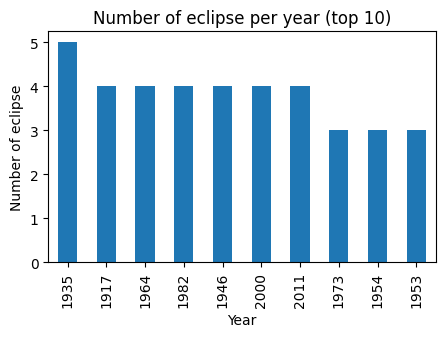

In [386]:
eclipse_df['year'].value_counts().nlargest(10).plot(kind='bar', figsize=(5,3))
plt.title("Number of eclipse per year (top 10)")
plt.ylabel('Number of eclipse')
plt.xlabel('Year')
plt.show()



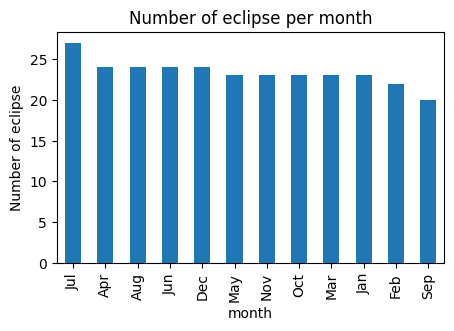

In [387]:
eclipse_df['month'].value_counts().plot(kind='bar', figsize=(5,3))
plt.title("Number of eclipse per month")
plt.ylabel('Number of eclipse')
plt.xlabel('month')
plt.show()

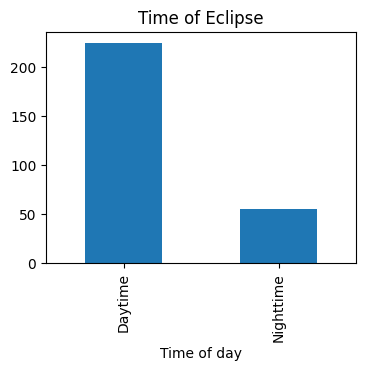

In [394]:

eclipse_df['daytime/nighttime'].value_counts().nlargest(5).plot(kind='bar', figsize=(4,3))
plt.title('Time of Eclipse')
plt.xlabel('Time of day')
plt.show()

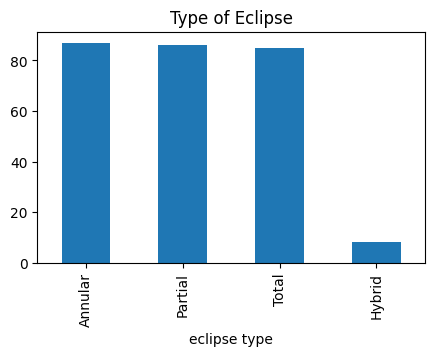

In [395]:
eclipse_df['eclipse_type'] = eclipse_df['eclipse_type'].replace(['A', 'P', 'T', 'H'], ['Annular', 'Partial', 'Total', 'Hybrid'])
eclipse_df['eclipse_type'].value_counts().nlargest(4).plot(kind='bar', figsize=(5, 3))
plt.title('Type of Eclipse')
plt.xlabel('eclipse type')
plt.show()

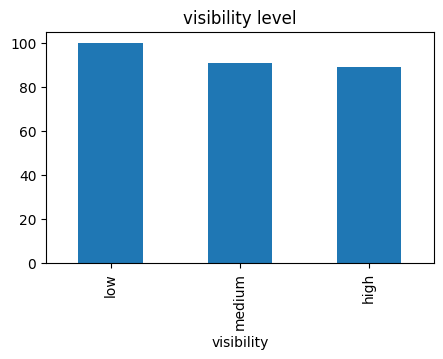

In [397]:
# bucket the visibility_score column
eclipse_df['visibility_score'] = pd.qcut(eclipse_df['visibility_score'], 3, labels = ['low', 'medium', 'high'])

#create a barplot
eclipse_df['visibility_score'].value_counts().plot(kind='bar', figsize=(5, 3))
plt.title('visibility level')
plt.xlabel('visibility')
plt.show()

#





#### The above project provides an idea of some of the general processes or steps that are carried out on a dataset during EDA. 
#### Operations are not limited to the ones done here and will always depend entirely on the specification and requirement of the dataset and the type of modelling or analysis that is intended to be carried out on it.